# Cities' Secrets for Success

### Mingus Knox White

#### What are the success factors of the top global destinations? Do different cities have similar factors?

Install the dependencies we will need for this notebook.

In [1]:
#import sys
#!{sys.executable} -m pip install scipy

import pandas as pd
import numpy as np

import geocoder
import requests
import json

import folium
import matplotlib.pyplot as plt

from scipy.cluster import hierarchy
import pylab
from sklearn.cluster import AgglomerativeClustering

from bs4 import BeautifulSoup as bs

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

Input the top 20 destinations from the Mastercard report

In [2]:
top20 = ['Bangkok, Thailand',
         'Paris, France',
         'London, United Kingdom',
         'Dubai, United Arab Emirates',
         'Singapore, Singapore',
         'Kuala Lumpur, Malaysia',
         'New York City, United States',
         'Istanbul, Turkey',
         'Tokyo, Japan',
         'Antalya, Turkey',
         'Seoul, South Korea',
         'Osaka, Japan',
         'Mecca, Saudi Arabia',
         'Phuket, Thailand',
         'Phatthaya, Thailand',
         'Milan, Italy',
         'Barcelona, Spain',
         'Palma, Spain',
         'Bali, Indonesia',
         'Hong Kong, Hong Kong SAR China']
top20_split = [top.split(', ') for top in top20]

Put the cities into a dataframe

In [3]:
top20_df = pd.DataFrame(top20_split)
top20_df.columns = ['City', 'Country']
top20_df

,City,Country
0,Bangkok,Thailand
1,Paris,France
2,London,United Kingdom
3,Dubai,United Arab Emirates
4,Singapore,Singapore
5,Kuala Lumpur,Malaysia
6,New York City,United States
7,Istanbul,Turkey
8,Tokyo,Japan
9,Antalya,Turkey


Add latitude and longitude coordinates to the dataframe.

In [4]:
lat = []
lng = []
for city in top20:
    g = geocoder.arcgis(city)
    latlng = g.latlng
    lat.append(latlng[0])
    lng.append(latlng[1])
top20_df['Latitude'] = lat
top20_df['Longitude'] = lng
top20_df

,City,Country,Latitude,Longitude
0,Bangkok,Thailand,13.753360,100.504830
1,Paris,France,48.857170,2.341400
2,London,United Kingdom,51.506420,-0.127210
3,Dubai,United Arab Emirates,25.269510,55.308840
4,Singapore,Singapore,1.290410,103.852110
5,Kuala Lumpur,Malaysia,3.147890,101.694050
6,New York City,United States,40.714550,-74.007140
7,Istanbul,Turkey,41.013840,28.949660
8,Tokyo,Japan,35.689456,139.691716
9,Antalya,Turkey,36.878950,30.709230


Allow the user to choose how many cities to add to the dataframe.
(Press ENTER for default.)

In [5]:
num_user_inputs = input('How many cities would you like to compare to the top 20 visited cities of 2018?')
if num_user_inputs == '':
    num_user_inputs = 5

How many cities would you like to compare to the top 20 visited cities of 2018? 


Create a dataframe of cities by user input. This dataframe will have the same columns as the top 20 dataframe from above. (Press ENTER for default.)

In [6]:
input_list = []
base_list = ['Cape Town, South Africa', 'Melbourne, Australia', 'Los Angeles, USA', 'Toronto, Canada', 'Rio de Janeiro, Brazil']

for i in range(int(num_user_inputs)):
    city = input('Enter the city you would like to compare (in the form City, Country): ')
    if city == '':
        city = base_list[i]
    g = geocoder.arcgis(city)
    split_city = city.split(', ')
    if split_city[1] == 'USA':
        split_city[1] = 'United States'
    input_list.append([split_city[0], split_city[1], g.latlng[0], g.latlng[1]])
    
user_inputs = pd.DataFrame(input_list, columns = ['City', 'Country', 'Latitude', 'Longitude'])
user_inputs

Enter the city you would like to compare (in the form City, Country):  
Enter the city you would like to compare (in the form City, Country):  
Enter the city you would like to compare (in the form City, Country):  
Enter the city you would like to compare (in the form City, Country):  
Enter the city you would like to compare (in the form City, Country):  


,City,Country,Latitude,Longitude
0,Cape Town,South Africa,-33.91909,18.42198
1,Melbourne,Australia,-37.81739,144.96751
2,Los Angeles,United States,34.05361,-118.24550
3,Toronto,Canada,43.64869,-79.38544
4,Rio de Janeiro,Brazil,-22.91216,-43.17501


Combine the two dataframes into one.

In [7]:
all_cities = top20_df.merge(user_inputs, how = 'outer')
all_cities

,City,Country,Latitude,Longitude
0,Bangkok,Thailand,13.753360,100.504830
1,Paris,France,48.857170,2.341400
2,London,United Kingdom,51.506420,-0.127210
3,Dubai,United Arab Emirates,25.269510,55.308840
4,Singapore,Singapore,1.290410,103.852110
5,Kuala Lumpur,Malaysia,3.147890,101.694050
6,New York City,United States,40.714550,-74.007140
7,Istanbul,Turkey,41.013840,28.949660
8,Tokyo,Japan,35.689456,139.691716
9,Antalya,Turkey,36.878950,30.709230


Plot a map of the world with points at every city in our dataframe. The top 20 cities are plotted in blue, the larger the point the higher ranked in visitation it is. The cities input by the user are plotted in red.

In [13]:
avg_lat = all_cities['Latitude'].mean()
avg_lng = all_cities['Longitude'].mean()
world_map = folium.Map(location = [avg_lat, avg_lng], zoom_start = 2)

for i, lat, lng, label in zip(all_cities.index, all_cities['Latitude'], all_cities['Longitude'], all_cities['City']):
    city = folium.Popup(label, parse_html = True)
    # The top 20 cities will be blue and range in radius size from 5 to 10
    if i < 20:
        rad = np.linspace(10, 5, num = 20)[i]
        col = 'blue'
    # The input cities will be red and have radius 4
    else:
        rad = 4
        col = 'red'
    folium.CircleMarker([lat, lng],
                        radius = rad,
                        popup = city,
                        color = col,
                        fill = True,
                        fill_color = col,
                        fill_opacity = 0.6,
                        parse_html = False).add_to(world_map)

world_map

Since we are using the Foursquare API, define the credentials we will need in order to make a call.

In [14]:
from credentials import foursquare

In [15]:
client_id = foursquare['id']
client_secret = foursquare['secret']
version = '20201201'
limit = 100

Call the Foursquare API to find (up to) the top 100 venues in each city. 

In [16]:
venues_list = []
for city, lat, lng in zip(all_cities['City'], all_cities['Latitude'], all_cities['Longitude']):
    # Create API request url to get venue data for each city
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&limit={}&time=any&day=any&sortByPopularity=1'.format(
            client_id,
            client_secret,
            version,
            lat,
            lng,
            limit)
    
    results = requests.get(url).json()['response']['groups'][0]['items']
    
    for venue in results:
        venues_list.append([
            city,
            lat,
            lng,
            venue['venue']['name'],
            venue['venue']['categories'][0]['name'],
            venue['venue']['id']
        ])

venues_df = pd.DataFrame(venues_list)
venues_df.columns = ['City', 'Latitude', 'Longitude', 'Venue Name', 'Venue Category', 'Venue ID']

venues_df.head()

,City,Latitude,Longitude,Venue Name,Venue Category,Venue ID
0,Bangkok,13.75336,100.50483,Mont Nom Sod (มนต์นมสด),Bakery,4bd44d2d046076b0aa987771
1,Bangkok,13.75336,100.50483,Thip Samai (ทิพย์สมัย (ผัดไทยประตูผี)),Noodle House,4c2f7415452620a1b4851d0f
2,Bangkok,13.75336,100.50483,Romaneenart Park (สวนรมณีนาถ),Park,4c1c8b0eb9f876b0521b7c46
3,Bangkok,13.75336,100.50483,Nai Ouan (นายอ้วน เย็นตาโฟเสาชิงช้า),Noodle House,4ca80edbf47ea1432ca97121
4,Bangkok,13.75336,100.50483,Cheng Sim Ei (เช็งซิมอี๊),Dessert Shop,5544b71c498e2e2bf2c9f8d0


One-hot encode the popular venues of each city, placing a "1" in the column of the matching venue category and a "0" in every other column.

In [17]:
onehot_venues = pd.get_dummies(venues_df['Venue Category'])
onehot_venues['City'] = venues_df['City']
col_order = [onehot_venues.columns[-1]] + list(onehot_venues.columns[:-1])
onehot_venues = onehot_venues[col_order]

Look at the top 10 most common venues in all the cities to see similarities.

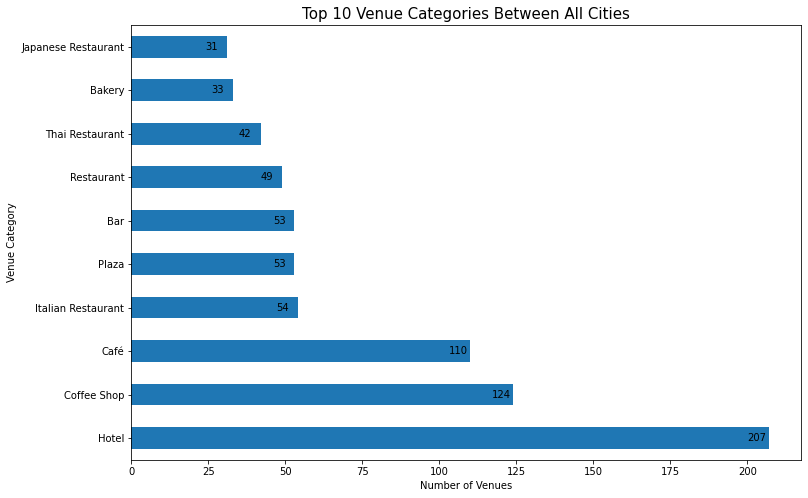

In [35]:
top10 = onehot_venues.drop('City', 1).sum().sort_values(ascending = False).head(10)

fig3 = plt.figure(figsize = (12, 8))
ax = fig3.add_subplot(111)

top10.plot(kind = 'barh', ax = ax)
for y, tot in zip(ax.get_yticks(), top10):
    ax.text(tot - 7, y - 0.07, tot, fontsize = 10)

ax.set_xlabel('Number of Venues')
ax.set_ylabel('Venue Category')
ax.set_title('Top 10 Venue Categories Between All Cities', fontdict = {'fontsize': 15})

plt.show()

Group the venues by their city and take the mean of the venue category. This gives a dataframe with the proportion of each venue category in the popular venues of each city.

In [19]:
venues_grouped = onehot_venues.groupby('City').mean().reset_index()
venues_grouped.head()

,City,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vietnamese Restaurant,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Yoshoku Restaurant,Zoo
0,Antalya,0.0,0.00,0.00,0.000000,0.0,0.010000,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.01,0.00,0.0,0.00,0.00,0.0,0.0
1,Bali,0.0,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.093750,...,0.0,0.03125,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0
2,Bangkok,0.0,0.00,0.00,0.017241,0.0,0.017241,0.017241,0.0,0.068966,...,0.0,0.00000,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0
3,Barcelona,0.0,0.01,0.00,0.000000,0.0,0.010000,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.00,0.00,0.0,0.01,0.01,0.0,0.0
4,Cape Town,0.0,0.00,0.02,0.000000,0.0,0.000000,0.000000,0.0,0.010000,...,0.0,0.00000,0.0,0.01,0.01,0.0,0.00,0.00,0.0,0.0


We will want to have the top venues in each city for future analysis, so we will create a new data frame with that information.

In [20]:
num_top = 10
suffixes = ['st', 'nd', 'rd']

# Set column names
cols = ['City']
for i in range(num_top):
    try:
        cols.append('{}{} Most Common Venue'.format(i+1, suffixes[i]))
    except:
        cols.append('{}th Most Common Venue'.format(i+1))

# Create the df        
top_venues = pd.DataFrame(columns = cols)
top_venues['City'] = venues_grouped['City']

# Get top categories for each City, setting None if there are less than num_top
for i in range(venues_grouped.shape[0]):
    category_list = venues_grouped.iloc[i, 1:]
    sorted_cats = category_list.sort_values(ascending = False)
    
    check_tops = 0
    while (sorted_cats[check_tops] != 0) and (check_tops < num_top):
        check_tops += 1
    
    top_cats = sorted_cats.index.values[:check_tops]
    top_cats = np.append(top_cats, [None for i in range(num_top - check_tops)])
    
    top_venues.iloc[i, 1:] = top_cats

top_venues.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Antalya,Hotel,Coffee Shop,Turkish Restaurant,Café,Bar,Ice Cream Shop,Dessert Shop,Gym / Fitness Center,Meyhane,Park
1,Bali,Indonesian Restaurant,Restaurant,Asian Restaurant,Hot Spring,BBQ Joint,Garden,Bakery,Balinese Restaurant,Temple,Botanical Garden
2,Bangkok,Thai Restaurant,Noodle House,Asian Restaurant,Hostel,Dessert Shop,Hotel,Chinese Restaurant,Café,Coffee Shop,Shrine
3,Barcelona,Hotel,Tapas Restaurant,Café,Plaza,Bookstore,Restaurant,Clothing Store,Burger Joint,Sandwich Place,Italian Restaurant
4,Cape Town,Hotel,Coffee Shop,Café,Restaurant,Italian Restaurant,Sushi Restaurant,Gay Bar,Gastropub,Theater,Burger Joint


We will scrape weatherspark.com for weather data of our cities.

The next two chunks of code will create a dataframe of each city and the url corresponding to the yearly weather data. Since we are interested in monthly weather, we will access each month through the full year webpage.

In [8]:
website = 'https://weatherspark.com'
baseurl = website + '/countries'
soup = bs(requests.get(baseurl).content)
city_weather_url = []
for i, city, country in zip(all_cities.index, all_cities['City'], all_cities['Country']):
    try:    
        country_path = soup.find("a", text = f"{country}")['href'] # row['Country']
        url = website + country_path
        while ('/y/' not in url):
            newsoup = bs(requests.get(url).content)
            match = newsoup.find("a", text = f"{city}")
            if match.find_parents(name='ul', attrs={"class":"breadcrumb"}) != []:
                match = match.findNext(name='a', text = f"{city}")
            path = match['href']
            url = website + path
    except: # likely due to specifications that will hardly alter weather patterns (need to specify district, etc)
        path = newsoup.find("a", attrs={"class":"ListPage-featured"})['href']
        url = website + path
    city_weather_url.append([city, url])

In [9]:
city_weather_url_df = pd.DataFrame(city_weather_url)
city_weather_url_df.columns = ['City', 'url']

Now create a list of average high and low temperatures of each month for each city by scraping the data from each month's webpage.

In [10]:
weather_avgs = []
for city, url in zip(city_weather_url_df['City'], city_weather_url_df['url']):
    soup = bs(requests.get(url).content)
    Jan_url = soup.find("a", text = "Jan")['href']
    month_urls = [Jan_url.replace('/1/', '/{}/').format(i + 1) for i in range(12)]
    city_weather = [city]
    for i in range(len(month_urls)):
        month_url = website + month_urls[i]
        soup = bs(requests.get(month_url).content)
        figure = soup.find("h2", attrs={"class":"Figure-title"})
        highs = figure.find_next_siblings("div", attrs={"class":"Figure-chart"})[0].findAll("g", attrs={"stroke-linejoin":"bevel"})
        lows = figure.find_next_siblings("div", attrs={"class":"Figure-chart"})[0].findAll("text", attrs={"stroke-linejoin":"bevel", "text-anchor":"middle"})

        tot_high = 0
        tot_low = 0
        for j in range(len(lows)):
            tot_low += int(lows[j].text.strip('°F'))
            for high in highs[j]:
                try:
                    tot_high += int(high.text.strip('°F'))
                except:
                    pass
        avg_high = round(tot_high / (j+1), 2)
        avg_low = round(tot_low / (j+1), 2)
        city_weather.extend([avg_high, avg_low])

    weather_avgs.append(city_weather)

Create a dataframe from the list of average temperatures.

In [11]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
columns = ['City']
for month in months:
    columns.extend([f"{month} High", f"{month} Low"])
total_weather_df = pd.DataFrame(weather_avgs)
total_weather_df.columns = columns
total_weather_df.head()

,City,Jan High,Jan Low,Feb High,Feb Low,Mar High,Mar Low,Apr High,Apr Low,May High,...,Aug High,Aug Low,Sep High,Sep Low,Oct High,Oct Low,Nov High,Nov Low,Dec High,Dec Low
0,Bangkok,89.00,72.00,91.00,75.00,93.00,78.00,94.67,80.00,93.75,...,91.00,79.00,90.33,78.33,89.25,77.50,89.00,75.67,88.33,72.33
1,Paris,44.50,36.00,46.67,36.00,52.75,39.25,59.00,43.25,66.00,...,75.33,57.33,70.00,53.67,61.00,47.25,52.00,41.33,45.75,37.00
2,London,47.33,39.33,47.67,39.33,51.75,41.50,57.50,44.75,63.25,...,72.25,59.00,67.33,55.00,59.75,50.00,53.33,44.67,48.75,40.75
3,Dubai,75.67,57.67,77.67,59.33,84.00,63.75,92.50,69.75,100.25,...,105.25,85.25,102.00,81.33,95.25,74.50,87.00,68.00,78.50,61.25
4,Singapore,86.25,76.75,88.00,77.00,89.00,77.75,89.00,78.67,89.00,...,87.50,78.75,87.67,78.00,88.00,78.00,87.00,77.00,86.25,77.00


Simplify the total weather dataframe into a dataframe of average seasonal weather.

In [12]:
season_weather_df = pd.DataFrame(columns = ['City', 'Avg Winter', 'Avg Spring', 'Avg Summer', 'Avg Fall'])
season_weather_df['City'] = all_cities['City']

avg_winter = []
avg_spring = []
avg_summer = []
avg_fall = []

for lat, city in zip(all_cities['Latitude'], all_cities['City']):
    
    # If the city is in the Northern Hemisphere
    if lat >= 0:    
        avg_winter.append(total_weather_df.set_index('City').loc[city, 'Jan High':'Mar Low'].mean())
        avg_spring.append(total_weather_df.set_index('City').loc[city, 'Apr High':'Jun Low'].mean())
        avg_summer.append(total_weather_df.set_index('City').loc[city, 'Jul High':'Sep Low'].mean())
        avg_fall.append(total_weather_df.set_index('City').loc[city, 'Oct High':'Dec Low'].mean())
    
    # If the city is in the Southern Hemisphere
    else:
        avg_summer.append(total_weather_df.set_index('City').loc[city, 'Jan High':'Mar Low'].mean())
        avg_fall.append(total_weather_df.set_index('City').loc[city, 'Apr High':'Jun Low'].mean())
        avg_winter.append(total_weather_df.set_index('City').loc[city, 'Jul High':'Sep Low'].mean())
        avg_spring.append(total_weather_df.set_index('City').loc[city, 'Oct High':'Dec Low'].mean())

season_weather_df['Avg Winter'] = avg_winter
season_weather_df['Avg Spring'] = avg_spring
season_weather_df['Avg Summer'] = avg_summer
season_weather_df['Avg Fall'] = avg_fall

season_weather_df.head()

,City,Avg Winter,Avg Spring,Avg Summer,Avg Fall
0,Bangkok,83.000000,86.820000,84.860000,82.013333
1,Paris,42.528333,57.333333,65.096667,47.388333
2,London,44.485000,56.583333,64.180000,49.541667
3,Dubai,69.681667,87.041667,93.930000,77.416667
4,Singapore,82.458333,83.903333,83.153333,82.208333


Normalize the weather averages so they have the same impact on the clustering we will use later.

In [21]:
min_max_scaler = MinMaxScaler(feature_range = (0, 0.5))
normalized_weather = min_max_scaler.fit_transform(season_weather_df.iloc[:,1:].values)
normalized_weather_df = pd.DataFrame(normalized_weather)
normalized_weather_df['City'] = season_weather_df['City']
cols = ['City'] + normalized_weather_df.columns[:-1].tolist()
normalized_weather_df = normalized_weather_df[cols]
normalized_weather_df.columns = season_weather_df.columns
normalized_weather_df.head()

,City,Avg Winter,Avg Spring,Avg Summer,Avg Fall
0,Bangkok,0.499505,0.462706,0.347563,0.493257
1,Paris,0.135442,0.041649,0.015406,0.083623
2,London,0.153043,0.030939,0.000000,0.109098
3,Dubai,0.379700,0.465872,0.500000,0.438875
4,Singapore,0.494633,0.421058,0.318880,0.495564


Before using the average weather for each season, we should check the correlation between them to ensure the best variable selection.

In [36]:
normalized_weather_df.corr()

,Avg Winter,Avg Spring,Avg Summer,Avg Fall
Avg Winter,1.000000,0.921399,0.702233,0.984858
Avg Spring,0.921399,1.000000,0.904657,0.961207
Avg Summer,0.702233,0.904657,1.000000,0.803445
Avg Fall,0.984858,0.961207,0.803445,1.000000


As seen above, spring and fall both have very high correlations with every other season. It is best to remove them from the clustering, leaving average summer and winter temperatures to be the only temperature features.

Combine venues dataframe with weather dataframe to prepare for clustering. Define the columns from the normalized weather dataframe to keep for clustering.

In [22]:
weather_cols = ['City', 'Avg Winter', 'Avg Summer']

cities_grouped = normalized_weather_df[weather_cols].join(venues_grouped.set_index('City'), on = 'City')
cities_grp_clustering = cities_grouped.drop(['City'], 1)
cities_grp_clustering.head()

,Avg Winter,Avg Summer,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,...,Vietnamese Restaurant,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Yoshoku Restaurant,Zoo
0,0.499505,0.347563,0.0,0.0,0.00,0.017241,0.0,0.017241,0.017241,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0
1,0.135442,0.015406,0.0,0.0,0.00,0.000000,0.0,0.010000,0.010000,0.01,...,0.0,0.0,0.0,0.03,0.02,0.00,0.00,0.00,0.0,0.0
2,0.153043,0.000000,0.0,0.0,0.01,0.010000,0.0,0.020000,0.020000,0.00,...,0.0,0.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,0.0
3,0.379700,0.500000,0.0,0.0,0.00,0.010000,0.0,0.020000,0.000000,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.02,0.00,0.0,0.0
4,0.494633,0.318880,0.0,0.0,0.00,0.000000,0.0,0.020000,0.000000,0.00,...,0.0,0.0,0.0,0.00,0.00,0.01,0.00,0.02,0.0,0.0


## Hierarchical Clustering

Form a distance matrix from the dataframe above to use for clustering. Then use hierarchical clustering to group the cities.

In [23]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(cities_grp_clustering, cities_grp_clustering)
dist_matrix.shape

(25, 25)

In [24]:
Z = hierarchy.linkage(dist_matrix, 'ward', optimal_ordering=True)

Plot a dendrogram to visualize the similarity and dissimilarity of the cities. Cities input by the user will be labeled in red on the y-axis to be easily located.

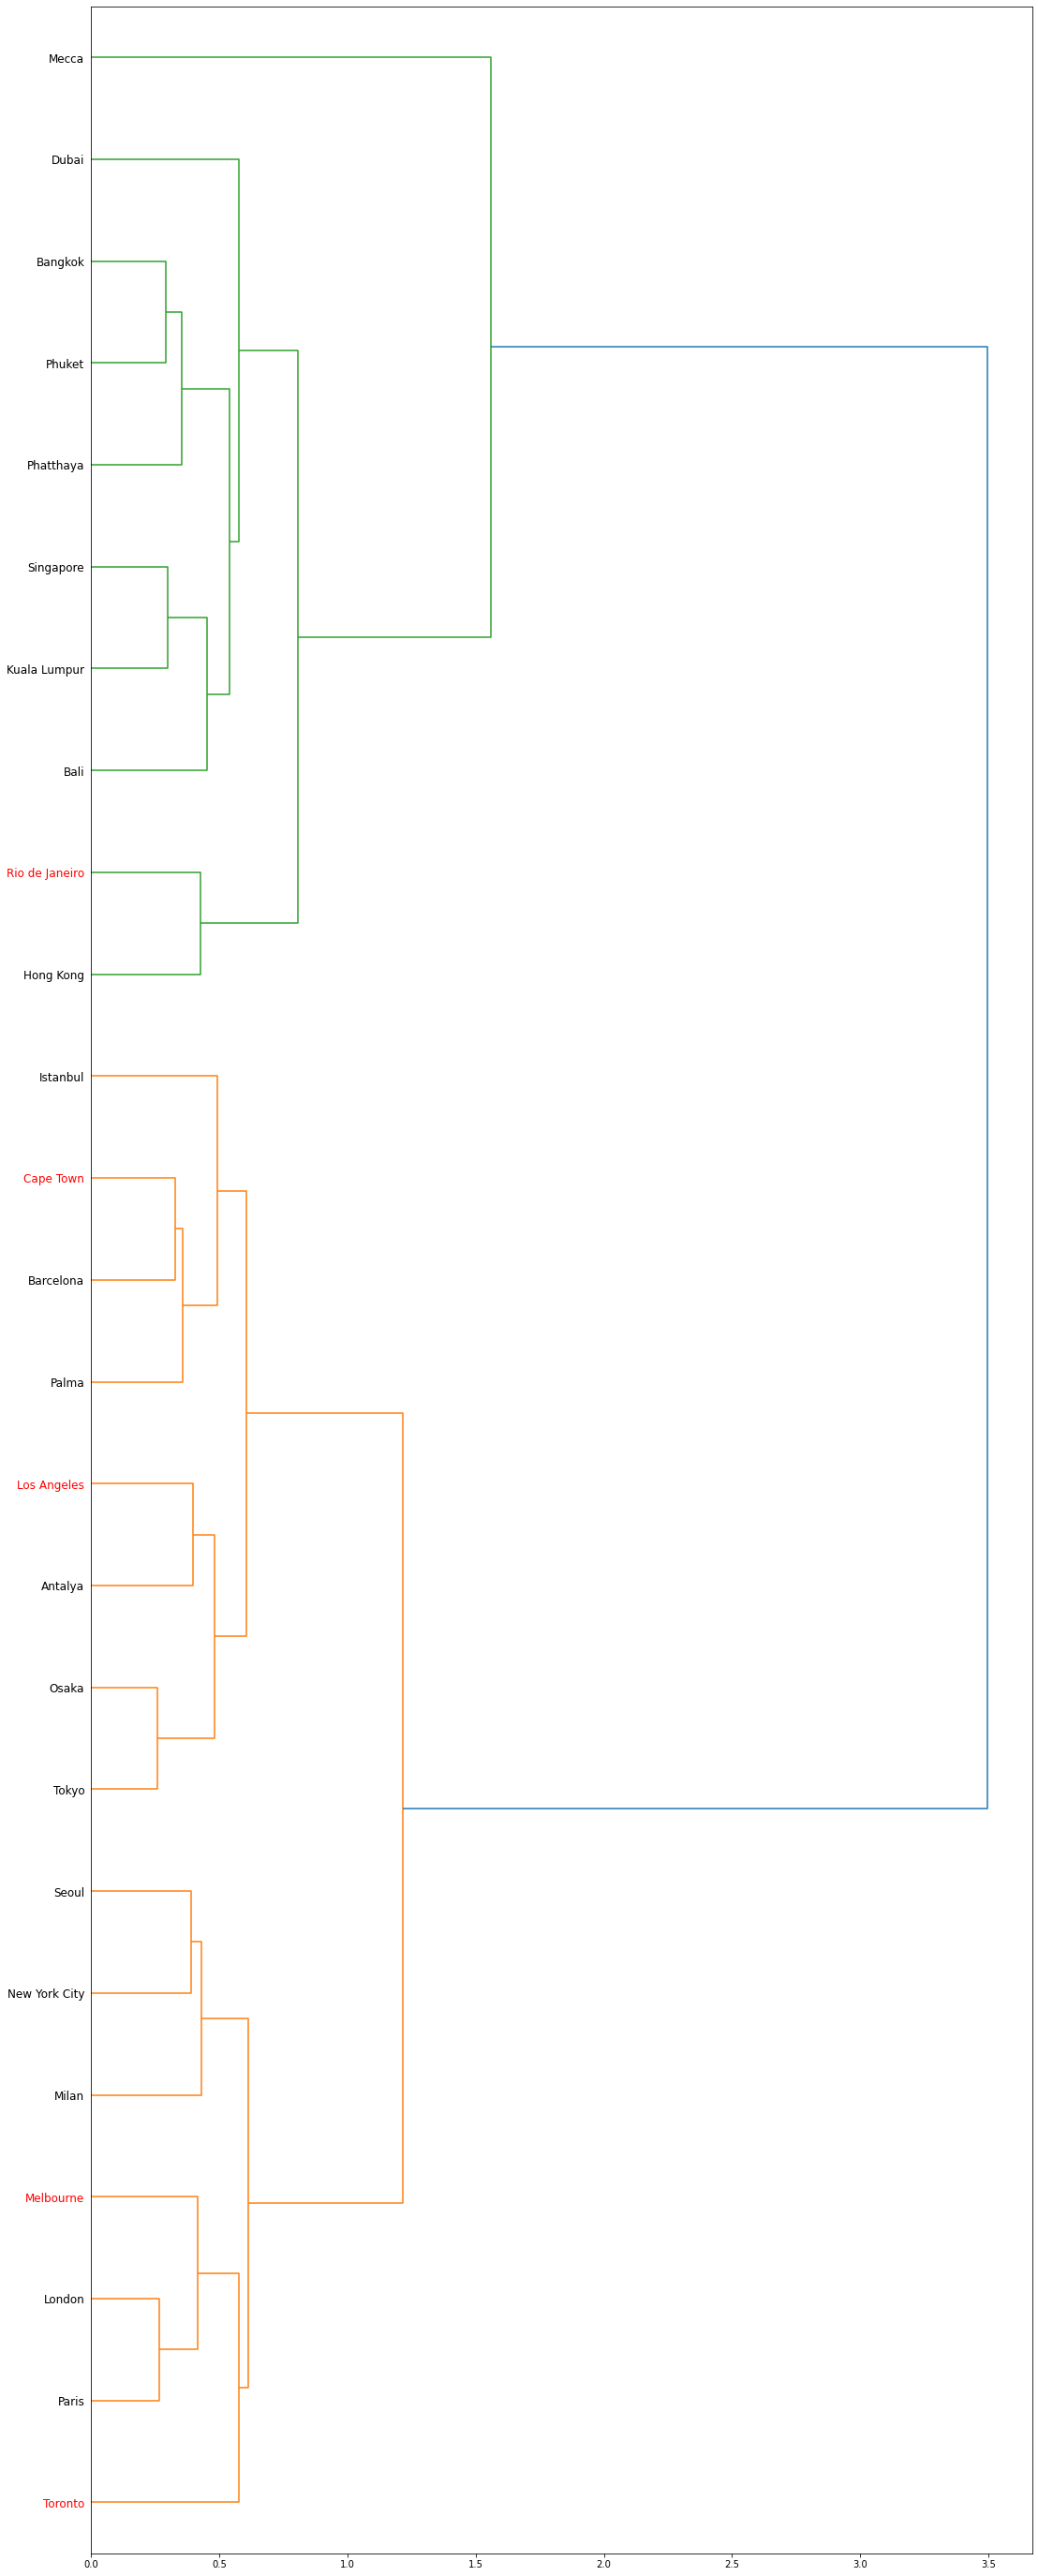

In [25]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return cities_grouped['City'][id]
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

ax = plt.gca()

ylbls = ax.get_ymajorticklabels()
for lbl in ylbls:
    # Filter for input cities by index >= 20
    if lbl.get_text() in all_cities[all_cities['City'].index >= 20]['City'].values:
        lbl.set_color('r')

plt.show()

Use AgglomerativeClustering to cluster the cities and label each row with the cluster it belongs to. We will use 5 clusters because it produces more relevant clusters than others were found to. The number of clusters can be easily altered, though.

In [26]:
num_clust = 5
agglom = AgglomerativeClustering(n_clusters = num_clust, linkage = 'ward', compute_distances=True)
agglom.fit(dist_matrix)

AgglomerativeClustering(compute_distances=True, n_clusters=5)

In [27]:
cities_grouped['cluster'] = agglom.labels_
cities_grouped.head()

,City,Avg Winter,Avg Summer,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,...,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Yoshoku Restaurant,Zoo,cluster
0,Bangkok,0.499505,0.347563,0.0,0.0,0.00,0.017241,0.0,0.017241,0.017241,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,3
1,Paris,0.135442,0.015406,0.0,0.0,0.00,0.000000,0.0,0.010000,0.010000,...,0.0,0.0,0.03,0.02,0.00,0.00,0.00,0.0,0.0,0
2,London,0.153043,0.000000,0.0,0.0,0.01,0.010000,0.0,0.020000,0.020000,...,0.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,0.0,0
3,Dubai,0.379700,0.500000,0.0,0.0,0.00,0.010000,0.0,0.020000,0.000000,...,0.0,0.0,0.00,0.00,0.00,0.02,0.00,0.0,0.0,3
4,Singapore,0.494633,0.318880,0.0,0.0,0.00,0.000000,0.0,0.020000,0.000000,...,0.0,0.0,0.00,0.00,0.01,0.00,0.02,0.0,0.0,3


To easily add clusters to other dataframes for analyses, we'll create a dataframe with each city and their cluster.

In [28]:
city_cluster = cities_grouped[['City', 'cluster']]

Print the cluster groups to see which cluster each city belongs to.

In [90]:
for i in range(num_clust):
    print('Cluster ' + str(i))
    display(all_cities[['City', 'Country']].loc[cities_grouped['cluster'] == i, :])

Cluster 0


,City,Country
1,Paris,France
2,London,United Kingdom
6,New York City,United States
10,Seoul,South Korea
15,Milan,Italy
21,Melbourne,Australia
23,Toronto,Canada


Cluster 1


,City,Country
7,Istanbul,Turkey
8,Tokyo,Japan
9,Antalya,Turkey
11,Osaka,Japan
16,Barcelona,Spain
17,Palma,Spain
20,Cape Town,South Africa
22,Los Angeles,United States


Cluster 2


,City,Country
12,Mecca,Saudi Arabia


Cluster 3


,City,Country
0,Bangkok,Thailand
3,Dubai,United Arab Emirates
4,Singapore,Singapore
5,Kuala Lumpur,Malaysia
13,Phuket,Thailand
14,Phatthaya,Thailand
18,Bali,Indonesia


Cluster 4


,City,Country
19,Hong Kong,Hong Kong SAR China
24,Rio de Janeiro,Brazil


Plot a map of the world with a point at each city in our dataframes. Points will be colored based on which cluster the city is in. (Each cluster has a color)

In [30]:
import matplotlib.cm as cm
import matplotlib.colors as colors

colors_array = cm.rainbow(np.linspace(0, 1, num_clust))
rainbow = [colors.rgb2hex(i) for i in colors_array]

avg_lat = all_cities['Latitude'].mean()
avg_lng = all_cities['Longitude'].mean()
clust_world_map = folium.Map(location = [avg_lat, avg_lng], zoom_start = 2)

for clust, lat, lng, label in zip(cities_grouped['cluster'], all_cities['Latitude'], all_cities['Longitude'], all_cities['City']):
    city = folium.Popup(label, parse_html = True)
    color = rainbow[clust]
    folium.CircleMarker([lat, lng],
                        radius = 5,
                        popup = city,
                        color = color,
                        fill = True,
                        fill_color = color,
                        fill_opacity = 0.6,
                        parse_html = False).add_to(clust_world_map)

clust_world_map

We want to compare the top venues of each cluster to determine differences between clusters. Create a dataframe with the percentage of top 5 categories for each cluster. Plot a bar chart to visualize the differences.

In [31]:
clust_top5 = pd.DataFrame(venues_grouped.merge(city_cluster).set_index('City').groupby('cluster').sum().iloc[0,:].sort_values(ascending = False).head(5)).T

for n in range(1, num_clust):
    clust_top5 = clust_top5.append(pd.DataFrame(venues_grouped.merge(city_cluster).set_index('City').groupby('cluster').sum().iloc[n,:].sort_values(ascending = False).head(5)).T)
clust_top5 = clust_top5.fillna(0).apply(lambda x: x*100 / sum(x) , axis = 1)
clust_top5['total'] = clust_top5.sum(axis = 1)
clust_top5

,Coffee Shop,Hotel,Café,Italian Restaurant,Plaza,Restaurant,Bar,Middle Eastern Restaurant,Thai Restaurant,Asian Restaurant,Brazilian Restaurant,Theater,total
0,26.282051,22.435897,17.307692,17.307692,16.666667,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,100.0
1,22.620491,30.354978,26.060606,0.000000,0.000000,11.197691,9.766234,0.00,0.000000,0.000000,0.000000,0.000000,100.0
2,7.812500,73.437500,4.687500,0.000000,0.000000,7.812500,0.000000,6.25,0.000000,0.000000,0.000000,0.000000,100.0
3,17.358903,32.068513,15.180123,0.000000,0.000000,0.000000,0.000000,0.00,20.987926,14.404535,0.000000,0.000000,100.0
4,0.000000,22.403126,0.000000,19.179420,0.000000,0.000000,16.509280,0.00,0.000000,0.000000,25.789645,16.118528,100.0


It is helpful to see a simple dataframe that shows the top category in each cluster.

In [99]:
pd.DataFrame(clust_top5.drop('total', 1).idxmax(axis = 1), columns = ['Top Venue Category'])

,Top Venue Category
0,Coffee Shop
1,Hotel
2,Hotel
3,Hotel
4,Brazilian Restaurant


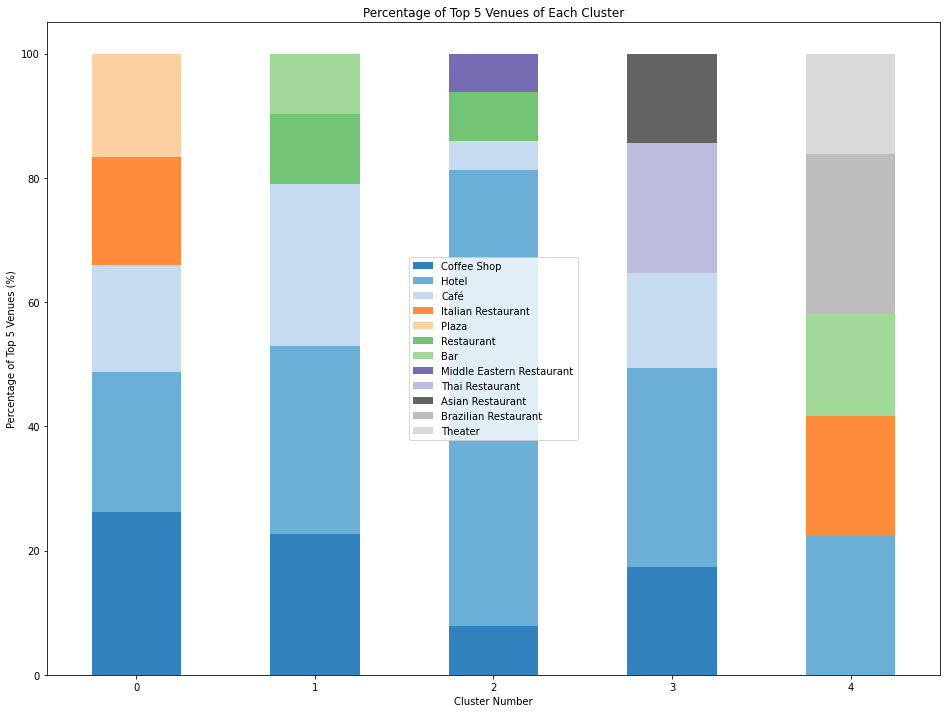

In [32]:
fig2 = plt.figure(figsize = (16, 12))
ax = fig2.add_subplot(111)

clust_top5.drop('total', 1).plot(kind = 'bar', stacked = True, ax = ax, rot = 0, colormap = 'tab20c')
ax.set_xlabel('Cluster Number')
ax.set_ylabel('Percentage of Top 5 Venues (%)')
ax.set_title('Percentage of Top 5 Venues of Each Cluster')

plt.show()

One thing that stands out is that Cluster 2 has a very much larger proportion of hotels than any other venues, while the other clusters all have similar proportions of each venue. Looking at the common venues in each cluster, all 5 clusters have hotels in their top 5 venue categories, and Cluster 4 is the only cluster that does not have coffee shops and cafés in its top 5 most common venues.

We can look at each city within each cluster to get a better understanding of the differences within each cluster, rather than between each cluster. (Click the three dots to expand.)

In [94]:
venue_clusters = top_venues.merge(city_cluster).set_index('City')

for i in range(num_clust):
    print('Cluster ' + str(i))
    display(venue_clusters[venue_clusters['cluster'] == i].iloc[:, :5])

Cluster 0


,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
City,,,,,
London,Hotel,Bakery,Garden,Theater,Monument / Landmark
Melbourne,Bar,Hotel,Coffee Shop,Asian Restaurant,Italian Restaurant
Milan,Italian Restaurant,Plaza,Ice Cream Shop,Hotel,Wine Bar
New York City,Coffee Shop,Hotel,American Restaurant,Bubble Tea Shop,Sandwich Place
Paris,French Restaurant,Plaza,Café,Hotel,Historic Site
Seoul,Coffee Shop,Korean Restaurant,Chinese Restaurant,Café,Hotel
Toronto,Coffee Shop,Café,Hotel,Restaurant,American Restaurant


Cluster 1


,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
City,,,,,
Antalya,Hotel,Coffee Shop,Turkish Restaurant,Café,Bar
Barcelona,Hotel,Tapas Restaurant,Café,Plaza,Bookstore
Cape Town,Hotel,Coffee Shop,Café,Restaurant,Italian Restaurant
Istanbul,Kebab Restaurant,Hotel,Café,Turkish Restaurant,Mosque
Los Angeles,Coffee Shop,Plaza,Ramen Restaurant,Mexican Restaurant,Bar
Osaka,Coffee Shop,Convenience Store,Café,Japanese Curry Restaurant,Japanese Restaurant
Palma,Café,Plaza,Spanish Restaurant,Tapas Restaurant,Bar
Tokyo,Convenience Store,Ramen Restaurant,Hotel,Camera Store,Udon Restaurant


Cluster 2


,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
City,,,,,
Mecca,Hotel,Restaurant,Coffee Shop,Middle Eastern Restaurant,Café


Cluster 3


,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
City,,,,,
Bali,Indonesian Restaurant,Restaurant,Asian Restaurant,Hot Spring,BBQ Joint
Bangkok,Thai Restaurant,Noodle House,Asian Restaurant,Hostel,Dessert Shop
Dubai,Hotel,Coffee Shop,Fast Food Restaurant,Café,Middle Eastern Restaurant
Kuala Lumpur,Indian Restaurant,Malay Restaurant,Asian Restaurant,Coffee Shop,Café
Phatthaya,Hotel,Thai Restaurant,Spa,Resort,Coffee Shop
Phuket,Thai Restaurant,Hotel,Noodle House,Coffee Shop,Bar
Singapore,Hotel,Café,Concert Hall,Shopping Mall,Coffee Shop


Cluster 4


,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
City,,,,,
Hong Kong,Italian Restaurant,Hotel,Steakhouse,Japanese Restaurant,Café
Rio de Janeiro,Brazilian Restaurant,Theater,Tram Station,Music Venue,Bar


We want to look at the distribution of average temperatures between clusters to determine differences between them. We will create a dataframe with the weather data and clusters, then plot a box plot of average temperatures, grouped by cluster number.

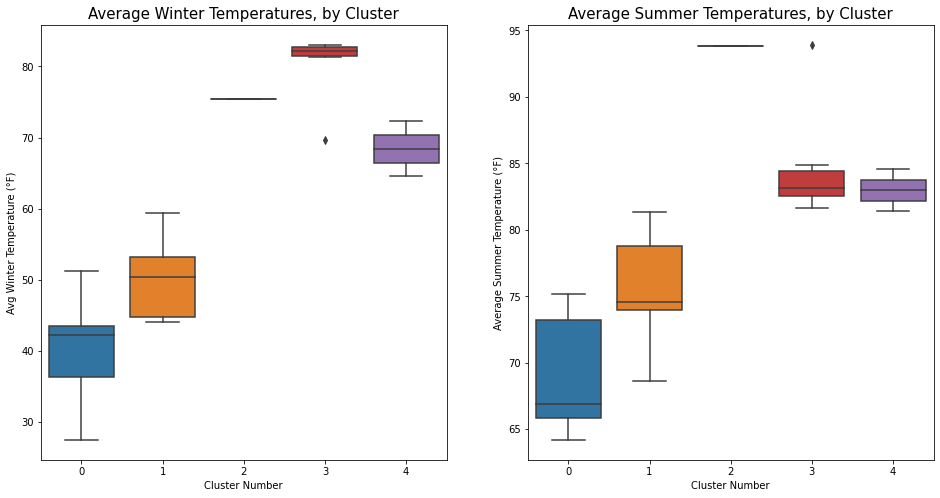

In [33]:
import seaborn as sns

season_clusters = season_weather_df.merge(city_cluster)

fig = plt.figure(figsize = (16, 8))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)


sns.boxplot(x = 'cluster', y = 'Avg Winter', data = season_clusters, ax = ax0)
ax0.set_xlabel('Cluster Number')
ax0.set_ylabel('Average Winter Temperature (°F)')
ax0.set_title('Average Winter Temperatures, by Cluster', fontdict = {'fontsize': 15})

sns.boxplot(x = 'cluster', y = 'Avg Summer', data = season_clusters, ax = ax1)
ax1.set_xlabel('Cluster Number')
ax1.set_ylabel('Average Summer Temperature (°F)')
ax1.set_title('Average Summer Temperatures, by Cluster', fontdict = {'fontsize': 15})

plt.show()

In [108]:
season_clusters[['Avg Winter', 'Avg Summer', 'cluster']].groupby('cluster').mean()

,Avg Winter,Avg Summer
cluster,,
0,40.102857,69.202381
1,50.282917,75.676875
2,75.388333,93.846667
3,80.486190,84.668571
4,68.409167,82.986667


We'll look at a scatter plot of average summer and winter temperatures of all the cities with and without their clusters. This will allow us to see potential groups that help form clusters, as well as seeing what the actual distribution of the clusters is.

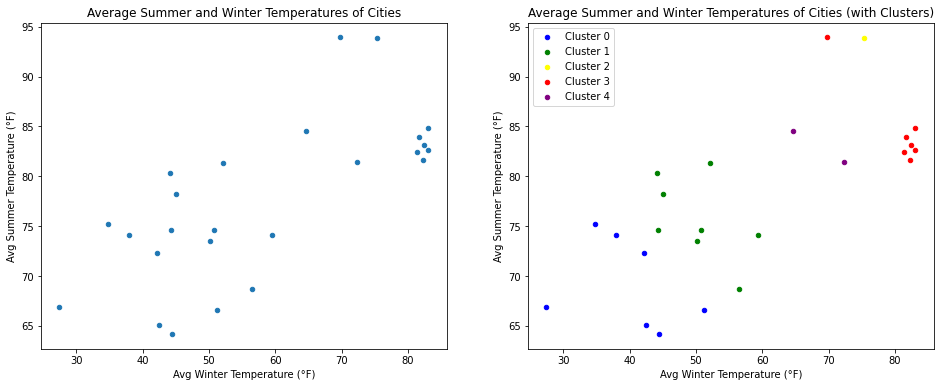

In [34]:
colors = ['blue', 'green', 'yellow', 'red', 'purple']

fig1 = plt.figure(figsize = (16, 6))
ax0 = fig1.add_subplot(1, 2, 1)
ax1 = fig1.add_subplot(1, 2, 2)

season_weather_df.merge(city_cluster).plot(kind = 'scatter', x = 'Avg Winter', y = 'Avg Summer', ax = ax0)
ax0.set_xlabel('Avg Winter Temperature (°F)')
ax0.set_ylabel('Avg Summer Temperature (°F)')
ax0.set_title('Average Summer and Winter Temperatures of Cities')

for i in range(num_clust):
    season_weather_df.merge(city_cluster)[city_cluster['cluster'] == i].plot(kind = 'scatter', x = 'Avg Winter', y = 'Avg Summer', c = colors[i], ax = ax1)
ax1.set_xlabel('Avg Winter Temperature (°F)')
ax1.set_ylabel('Avg Summer Temperature (°F)')
ax1.set_title('Average Summer and Winter Temperatures of Cities (with Clusters)')
ax1.legend(labels = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'))

plt.show()